## Análise Estatística dos Dados Meteorológicos (2008–2024)

Esta primeira parte realiza a leitura e análise descritiva de arquivos meteorológicos para diversas cidades do Piauí, com o objetivo de extrair estatísticas básicas de variáveis numéricas. Abaixo estão os principais passos do código:

1. **Leitura dos dados**: cada arquivo `.csv` é lido individualmente, pulando as 10 primeiras linhas que contêm metadados.
2. **Identificação da coluna de data**: é identificada para ser preservada, mas excluída da análise numérica.
3. **Conversão de dados numéricos**: valores com vírgula como separador decimal são convertidos para o padrão numérico do Python.
4. **Seleção de colunas numéricas**: são escolhidas apenas as colunas numéricas para gerar estatísticas.
5. **Cálculo das estatísticas**:
   - Média
   - Mediana
   - Desvio padrão
   - Mínimo
   - Máximo
   - Contagem de valores não nulos (`Não Nulos`)
   - Contagem de valores nulos (`Nulos`)
6. **Formatação**:
   - As colunas com contagem (`Nulos` e `Não Nulos`) são convertidas para `int`.
   - As demais estatísticas são arredondadas para 2 casas decimais.
7. **Exibição**: o resumo estatístico é exibido separadamente para cada cidade com `display()`.

O objetivo final é obter uma visão geral da qualidade e da distribuição dos dados meteorológicos ao longo dos anos, facilitando análises futuras e decisões baseadas em dados.

In [20]:
import pandas as pd

# Caminhos dos arquivos
arquivos = {
    "Floriano": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Floriano_2008-01-01_2024-12-31.csv",
    "Picos": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Picos_2008-12-11_2024-12-31.csv",
    "Teresina": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Teresina_2008-01-01_2024-12-31.csv",
    "Piripiri": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Piripiri_2008-01-01_2024-12-31.csv",
    "Parnaiba": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Parnaiba_2008-01-01_2024-12-31.csv"
}

for nome, caminho in arquivos.items():
    print(f"\n{'='*30}\nEstatísticas de {nome}\n{'='*30}")
    
    # Leitura da base
    base = pd.read_csv(
        caminho,
        skiprows=10,
        sep=";",
        encoding="latin1"
    )
    
    # Identifica a coluna de data (sem remover)
    col_data = None
    for col in base.columns:
        if "data" in col.lower():
            col_data = col
            break
    
    # Converte colunas (exceto data) de vírgula para ponto e para numérico
    for col in base.columns:
        if col != col_data:
            try:
                base[col] = pd.to_numeric(base[col].str.replace(',', '.'), errors='coerce')
            except:
                pass

    # Seleciona colunas numéricas, excluindo a de data se estiver ali
    colunas_numericas = base.select_dtypes(include='number').columns
    if col_data in colunas_numericas:
        colunas_numericas = colunas_numericas.drop(col_data)
    base_numerica = base[colunas_numericas]
    
    # Estatísticas principais
    estatisticas = base_numerica.agg(['mean', 'median', 'std', 'min', 'max', 'count']).T
    estatisticas.columns = ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Não Nulos']
    
    # Coluna adicional de valores nulos
    estatisticas['Nulos'] = base_numerica.isna().sum()
    
    # Converte contagens para inteiro
    estatisticas[['Não Nulos', 'Nulos']] = estatisticas[['Não Nulos', 'Nulos']].astype(int)
    
    # Arredonda as colunas de média, mediana etc.
    estatisticas[['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']] = estatisticas[
        ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']
    ].round(2)
    
    # Exibição
    display(estatisticas)



Estatísticas de Floriano


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),2.33,0.00,8.74,0.0,152.8,4091,2119
PRESSAO ATMOSFERICA MEDIA (mB),996.94,996.80,1.83,991.5,1003.1,4841,1369
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),18.84,20.30,3.71,6.9,24.5,4841,1369
TEMPERATURA MAXIMA (°C),34.78,34.80,2.97,24.6,42.0,4863,1347
TEMPERATURA MEDIA (°C),28.44,28.10,2.19,22.9,35.0,4820,1390
TEMPERATURA MINIMA (°C),23.51,23.40,1.72,17.0,30.3,4871,1339
UMIDADE RELATIVA DO AR MEDIA (%),60.84,64.05,17.30,23.9,90.5,4924,1286
UMIDADE RELATIVA DO AR MINIMA (%),38.74,37.00,14.91,10.0,92.0,5087,1123
"VENTO, RAJADA MAXIMA (m/s)",8.45,8.40,2.53,0.1,22.9,5052,1158
"VENTO, VELOCIDADE MEDIA (m/s)",1.32,1.10,0.73,0.0,4.4,4840,1370



Estatísticas de Picos


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),1.30,0.0,5.61,0.0,111.4,3573,2292
PRESSAO ATMOSFERICA MEDIA (mB),985.23,985.0,2.02,979.4,991.7,4307,1558
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),16.47,16.1,3.72,1.1,24.1,3876,1989
TEMPERATURA MAXIMA (°C),35.28,35.3,2.69,23.8,41.6,4730,1135
TEMPERATURA MEDIA (°C),28.51,28.3,2.13,22.3,34.1,3779,2086
TEMPERATURA MINIMA (°C),22.62,22.6,2.27,14.8,28.9,4703,1162
UMIDADE RELATIVA DO AR MEDIA (%),53.10,50.3,16.10,19.4,93.4,4543,1322
UMIDADE RELATIVA DO AR MINIMA (%),32.96,29.0,14.20,10.0,89.0,5447,418
"VENTO, RAJADA MAXIMA (m/s)",9.53,9.5,2.34,1.8,23.7,4150,1715
"VENTO, VELOCIDADE MEDIA (m/s)",2.17,2.1,0.66,0.8,5.4,3457,2408



Estatísticas de Teresina


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),3.77,0.0,10.74,0.0,145.6,5011,1199
PRESSAO ATMOSFERICA MEDIA (mB),1002.71,1002.7,1.68,997.1,1008.6,5228,982
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),20.64,21.4,2.42,11.4,25.5,5228,982
TEMPERATURA MAXIMA (°C),34.20,33.7,2.57,25.6,41.7,5307,903
TEMPERATURA MEDIA (°C),27.75,27.5,1.61,23.7,32.8,5132,1078
TEMPERATURA MINIMA (°C),23.00,23.1,1.62,15.8,28.8,5339,871
UMIDADE RELATIVA DO AR MEDIA (%),68.62,71.3,12.27,31.6,92.5,5529,681
UMIDADE RELATIVA DO AR MINIMA (%),42.40,44.0,14.15,13.0,92.0,5886,324
"VENTO, RAJADA MAXIMA (m/s)",8.12,7.8,2.33,1.2,22.8,5858,352
"VENTO, VELOCIDADE MEDIA (m/s)",1.17,1.1,0.37,0.1,3.0,5226,984



Estatísticas de Piripiri


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),4.09,0.0,11.25,0.0,171.2,5339,871
PRESSAO ATMOSFERICA MEDIA (mB),992.54,992.5,1.63,987.3,997.9,5483,727
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),20.24,20.7,2.59,10.0,25.0,5465,745
TEMPERATURA MAXIMA (°C),35.05,34.9,2.71,24.8,42.8,5512,698
TEMPERATURA MEDIA (°C),27.92,27.9,1.69,23.3,33.4,5460,750
TEMPERATURA MINIMA (°C),22.78,22.8,1.30,17.7,27.7,5503,707
UMIDADE RELATIVA DO AR MEDIA (%),67.76,67.7,12.91,29.1,94.1,5527,683
UMIDADE RELATIVA DO AR MINIMA (%),37.47,35.0,14.19,10.0,92.0,5746,464
"VENTO, RAJADA MAXIMA (m/s)",9.36,9.0,2.45,2.4,23.3,5588,622
"VENTO, VELOCIDADE MEDIA (m/s)",1.73,1.7,0.51,0.3,4.6,5334,876



Estatísticas de Parnaiba


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),2.87,0.0,9.20,0.0,154.8,5151,1059
PRESSAO ATMOSFERICA MEDIA (mB),1005.22,1005.2,1.53,1000.1,1010.4,5266,944
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),22.36,22.5,1.76,15.0,27.9,4682,1528
TEMPERATURA MAXIMA (°C),33.51,33.5,2.20,24.5,41.8,5354,856
TEMPERATURA MEDIA (°C),27.04,27.0,1.33,22.0,31.7,5260,950
TEMPERATURA MINIMA (°C),23.22,23.3,1.40,18.0,29.2,5366,844
UMIDADE RELATIVA DO AR MEDIA (%),77.06,77.0,9.15,43.8,99.4,5115,1095
UMIDADE RELATIVA DO AR MINIMA (%),50.73,49.0,14.01,10.0,100.0,5430,780
"VENTO, RAJADA MAXIMA (m/s)",10.30,10.4,2.64,0.0,24.0,5435,775
"VENTO, VELOCIDADE MEDIA (m/s)",3.03,2.9,1.31,0.0,6.4,5201,1009


## Tratamento de Dados Faltantes e Outliers


### 1. Preenchimento de Valores Faltantes (Nulos ou Vazios)

Para lidar com valores ausentes nos registros meteorológicos, utilizamos o **Método do Vizinho Mais Próximo (KNN - Nearest Neighbor)**:

- Esse método analisa as amostras com dados completos e encontra os registros mais semelhantes (vizinhos).
- O valor ausente é estimado com base nos valores desses vizinhos.
- Parâmetros utilizados:
  - `n_neighbors = 5`: cada valor ausente é estimado com base nos 5 vizinhos mais próximos.
  - `weights = 'uniform'`: todos os vizinhos têm o mesmo peso na média.

Essa técnica é eficaz em dados multivariados, como em séries temporais meteorológicas com correlação entre variáveis (ex: temperatura, umidade, pressão).

---

### 2. Tratamento de Outliers (Valores Atípicos)

Para detectar e corrigir valores extremos usamos o **método do Intervalo Interquartil (IQR)**:

- Calcula-se os quartis Q1 (25%) e Q3 (75%) para cada variável.
- O intervalo IQR é dado por:  
  `IQR = Q3 - Q1`
- Define-se como outlier qualquer valor:
  - Abaixo de `Q1 - 1.5 * IQR`
  - Acima de `Q3 + 1.5 * IQR`
- Os valores considerados outliers são **substituídos pela mediana** da respectiva variável.


In [21]:
import pandas as pd
from sklearn.impute import KNNImputer

# Caminhos dos arquivos
arquivos = {
    "Floriano": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Floriano_2008-01-01_2024-12-31.csv",
    "Picos": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Picos_2008-12-11_2024-12-31.csv",
    "Teresina": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Teresina_2008-01-01_2024-12-31.csv",
    "Piripiri": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Piripiri_2008-01-01_2024-12-31.csv",
    "Parnaiba": r"C:\Users\Vc682\Downloads\Dados Meteorologicos\dados_Parnaiba_2008-01-01_2024-12-31.csv"
}

for nome, caminho in arquivos.items():
    print(f"\n{'='*30}\nTratamento de dados - {nome}\n{'='*30}")
    
    # Leitura dos dados
    base = pd.read_csv(
        caminho,
        skiprows=10,
        sep=";",
        encoding="latin1"
    )
    
    # Identifica coluna de data (mantida na base, mas não usada no KNN ou IQR)
    col_data = None
    for col in base.columns:
        if "data" in col.lower():
            col_data = col
            break

    # Conversão de vírgula para ponto e valores numéricos
    for col in base.columns:
        if col != col_data:
            try:
                base[col] = pd.to_numeric(base[col].str.replace(',', '.'), errors='coerce')
            except:
                pass

    # Colunas numéricas válidas (sem a de data)
    colunas_numericas = base.select_dtypes(include='number').columns
    if col_data in colunas_numericas:
        colunas_numericas = colunas_numericas.drop(col_data)


    # 1. IMPUTAÇÃO COM KNN (Método do Vizinho Mais Próximo (Nearest Neighbor))
    imputer = KNNImputer(n_neighbors=5, weights='uniform')
    dados_imputados = imputer.fit_transform(base[colunas_numericas])
    base[colunas_numericas] = pd.DataFrame(dados_imputados, columns=colunas_numericas)

    # 2. TRATAMENTO DE OUTLIERS (IQR)
    for col in colunas_numericas:
        q1 = base[col].quantile(0.25)
        q3 = base[col].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        mediana = base[col].median()
        
        base[col] = base[col].apply(
            lambda x: mediana if x < limite_inferior or x > limite_superior else x
        )

    
    # Recalcula valores nulos (serão zero após KNN)
    estatisticas_pos = base[colunas_numericas].agg(['mean', 'median', 'std', 'min', 'max', 'count']).T
    estatisticas_pos.columns = ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Não Nulos']
    estatisticas_pos['Nulos'] = base[colunas_numericas].isna().sum()

    # Formata as colunas
    estatisticas_pos[['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']] = estatisticas_pos[
        ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']
    ].round(2)
    estatisticas_pos[['Não Nulos', 'Nulos']] = estatisticas_pos[['Não Nulos', 'Nulos']].astype(int)

    # Exibe
    display(estatisticas_pos)


Tratamento de dados - Floriano


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),0.75,0.00,1.19,0.0,5.80,6210,0
PRESSAO ATMOSFERICA MEDIA (mB),996.86,996.94,1.35,993.5,1000.22,6210,0
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),18.93,18.84,3.29,10.0,24.50,6210,0
TEMPERATURA MAXIMA (°C),34.86,34.78,2.40,28.6,40.90,6210,0
TEMPERATURA MEDIA (°C),28.32,28.44,1.83,23.7,32.80,6210,0
TEMPERATURA MINIMA (°C),23.45,23.51,1.14,20.5,26.40,6210,0
UMIDADE RELATIVA DO AR MEDIA (%),61.02,60.84,15.58,23.9,90.50,6210,0
UMIDADE RELATIVA DO AR MINIMA (%),38.59,38.74,13.25,10.0,78.00,6210,0
"VENTO, RAJADA MAXIMA (m/s)",8.35,8.45,2.08,2.8,14.10,6210,0
"VENTO, VELOCIDADE MEDIA (m/s)",1.16,1.28,0.40,0.0,2.30,6210,0



Tratamento de dados - Picos


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),0.29,0.00,0.64,0.0,3.24,5865,0
PRESSAO ATMOSFERICA MEDIA (mB),985.20,985.23,1.71,980.7,989.60,5865,0
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),17.09,16.50,3.70,5.2,24.10,5865,0
TEMPERATURA MAXIMA (°C),35.25,35.28,2.46,28.3,41.60,5865,0
TEMPERATURA MEDIA (°C),28.34,28.30,2.01,22.9,34.00,5865,0
TEMPERATURA MINIMA (°C),22.64,22.62,1.64,18.5,26.80,5865,0
UMIDADE RELATIVA DO AR MEDIA (%),55.10,53.10,16.26,19.4,93.40,5865,0
UMIDADE RELATIVA DO AR MINIMA (%),32.26,30.00,12.63,10.0,68.00,5865,0
"VENTO, RAJADA MAXIMA (m/s)",9.48,9.53,1.86,4.3,14.70,5865,0
"VENTO, VELOCIDADE MEDIA (m/s)",2.14,2.17,0.55,0.8,3.70,5865,0



Tratamento de dados - Teresina


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),0.60,0.00,1.32,0.0,6.48,6210,0
PRESSAO ATMOSFERICA MEDIA (mB),1002.69,1002.71,1.48,998.7,1006.70,6210,0
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),20.65,21.10,2.32,13.6,25.50,6210,0
TEMPERATURA MAXIMA (°C),34.18,33.80,2.47,27.0,40.90,6210,0
TEMPERATURA MEDIA (°C),27.76,27.60,1.51,23.7,31.70,6210,0
TEMPERATURA MINIMA (°C),23.17,23.10,1.25,19.8,26.50,6210,0
UMIDADE RELATIVA DO AR MEDIA (%),68.61,70.00,11.88,31.6,92.50,6210,0
UMIDADE RELATIVA DO AR MINIMA (%),42.35,42.40,13.70,13.0,85.00,6210,0
"VENTO, RAJADA MAXIMA (m/s)",7.89,8.00,1.84,2.9,13.00,6210,0
"VENTO, VELOCIDADE MEDIA (m/s)",1.16,1.16,0.33,0.3,2.12,6210,0



Tratamento de dados - Piripiri


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),1.00,0.00,2.03,0.0,10.2,6210,0
PRESSAO ATMOSFERICA MEDIA (mB),992.52,992.54,1.47,988.5,996.5,6210,0
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),20.28,20.30,2.41,13.3,25.0,6210,0
TEMPERATURA MAXIMA (°C),35.05,35.05,2.58,27.1,42.8,6210,0
TEMPERATURA MEDIA (°C),27.92,27.92,1.61,23.4,32.5,6210,0
TEMPERATURA MINIMA (°C),22.82,22.78,1.11,19.9,25.8,6210,0
UMIDADE RELATIVA DO AR MEDIA (%),67.80,67.76,12.36,29.1,94.1,6210,0
UMIDADE RELATIVA DO AR MINIMA (%),37.44,37.47,13.59,10.0,80.0,6210,0
"VENTO, RAJADA MAXIMA (m/s)",9.05,9.20,1.80,4.2,14.1,6210,0
"VENTO, VELOCIDADE MEDIA (m/s)",1.70,1.70,0.44,0.5,2.9,6210,0



Tratamento de dados - Parnaiba


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Não Nulos,Nulos
PRECIPITAÇÃO TOTAL (mm),0.70,0.00,1.44,0.0,7.16,6210,0
PRESSAO ATMOSFERICA MEDIA (mB),1005.18,1005.22,1.35,1001.6,1008.80,6210,0
TEMPERATURA DO PONTO DE ORVALHO MEDIA (°C),22.59,22.50,1.47,18.3,26.90,6210,0
TEMPERATURA MAXIMA (°C),33.54,33.51,1.94,28.2,38.90,6210,0
TEMPERATURA MEDIA (°C),27.03,27.04,1.06,24.1,30.00,6210,0
TEMPERATURA MINIMA (°C),23.25,23.22,1.09,20.3,26.20,6210,0
UMIDADE RELATIVA DO AR MEDIA (%),77.70,77.06,8.58,53.7,99.40,6210,0
UMIDADE RELATIVA DO AR MINIMA (%),50.21,50.73,12.45,15.0,86.00,6210,0
"VENTO, RAJADA MAXIMA (m/s)",10.37,10.30,2.19,4.3,16.50,6210,0
"VENTO, VELOCIDADE MEDIA (m/s)",3.02,3.03,1.23,0.0,6.40,6210,0


## Análise de Correlação entre Variáveis

A **correlação de Pearson** é uma medida estatística que indica o grau de relação entre duas variáveis numéricas. O valor da correlação varia de **-1 a 1**:
- **1**: Correlação positiva perfeita (as variáveis aumentam ou diminuem juntas).
- **-1**: Correlação negativa perfeita (quando uma aumenta, a outra diminui).
- **0**: Nenhuma correlação linear (não há relação direta entre as variáveis).

Para cada cidade foi calculada a **matriz de correlação** entre as variáveis numéricas e visualizamos as relações com um **heatmap**:
1. A matriz de correlação mostra o valor de correlação entre todas as variáveis numéricas.
2. O **heatmap** é utilizado para visualizar facilmente quais variáveis estão mais fortemente relacionadas.

### Visualização:
Através de um **heatmap** gerado pela biblioteca **seaborn**, podemos observar de forma clara as correlações entre as variáveis. As cores indicam a intensidade da correlação:
- **Vermelho (positivo)**: correlação forte e positiva.
- **Azul (negativo)**: correlação forte e negativa.
- **Branco (próximo de 0)**: sem correlação ou correlação fraca.


Correlação das Variáveis - Floriano


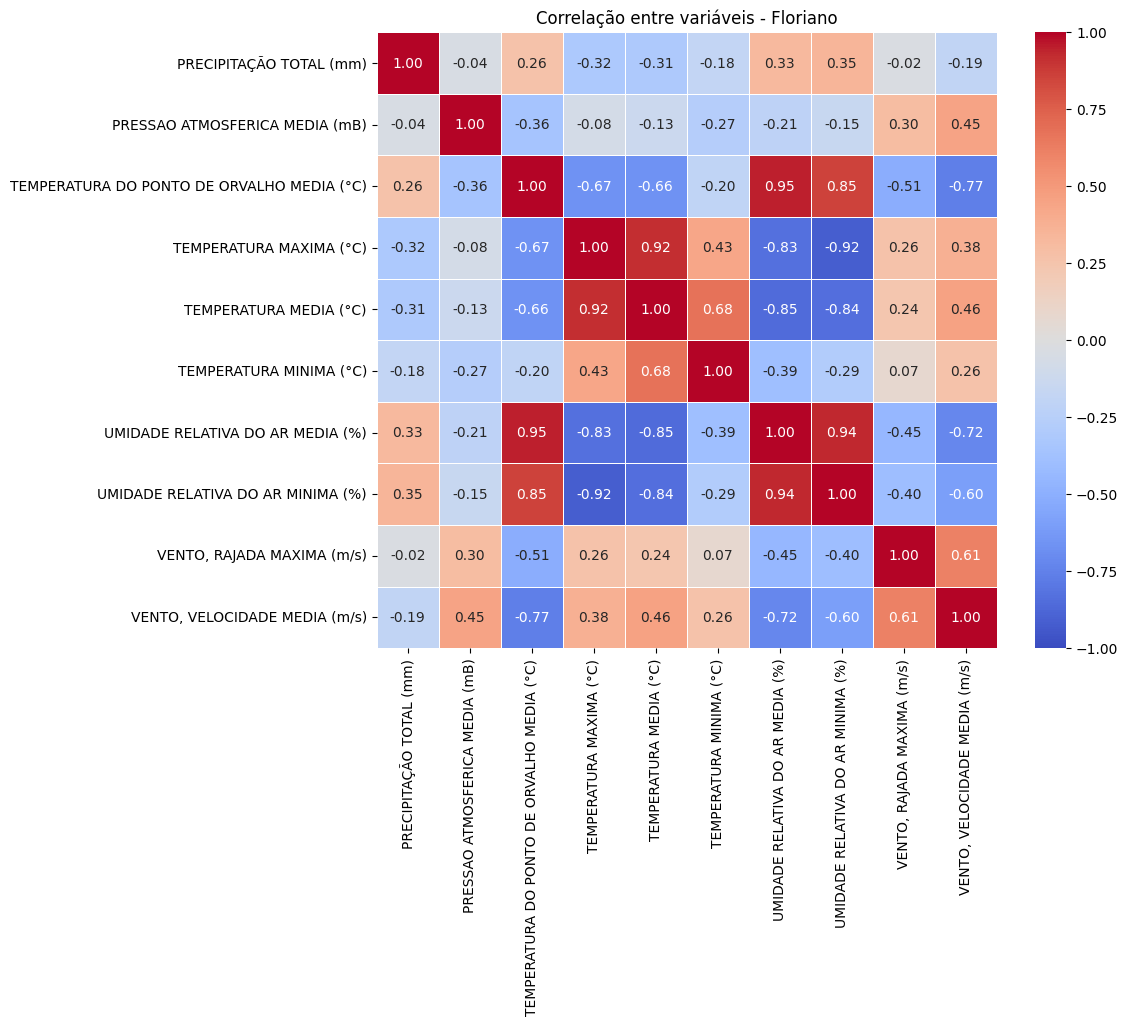


Correlação das Variáveis - Picos


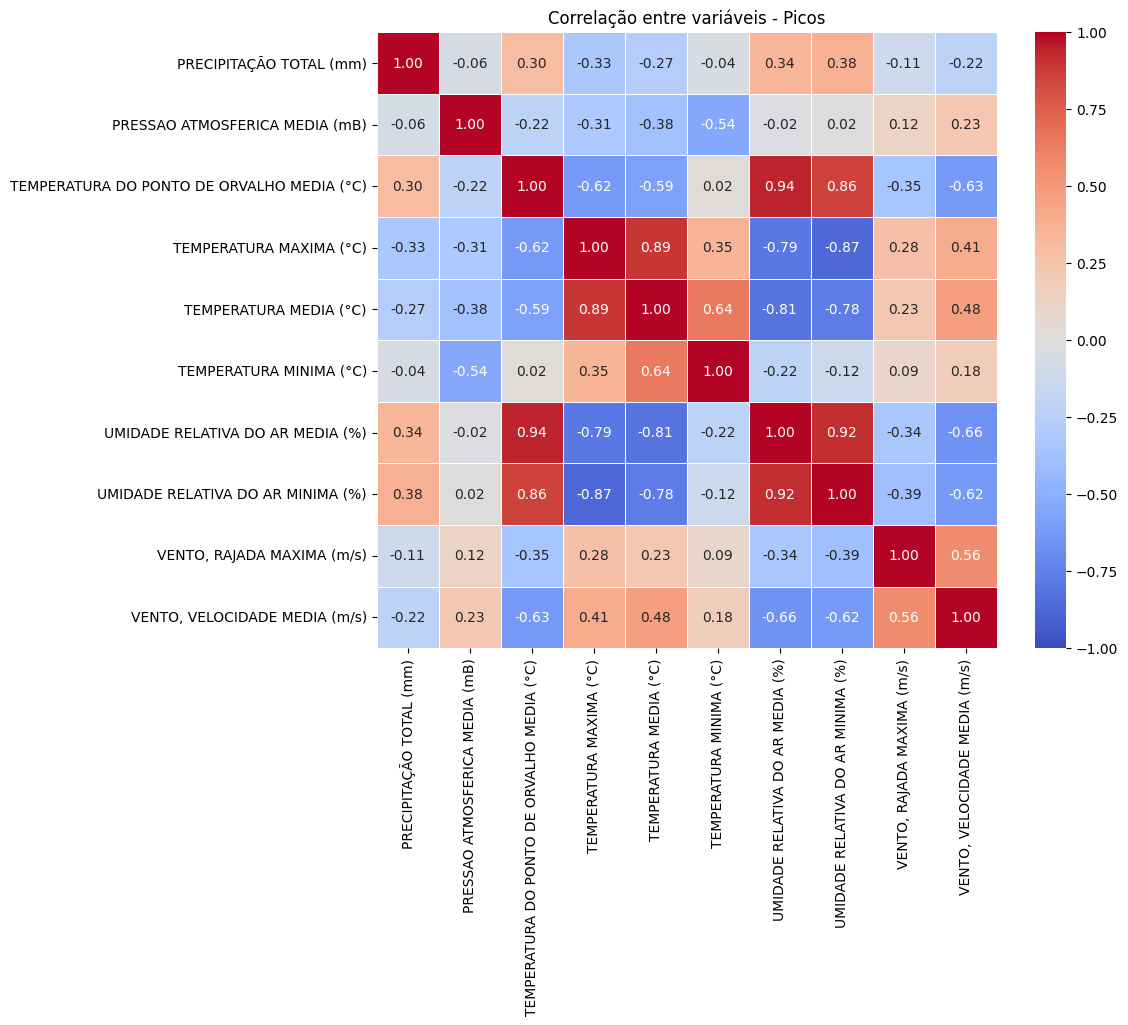


Correlação das Variáveis - Teresina


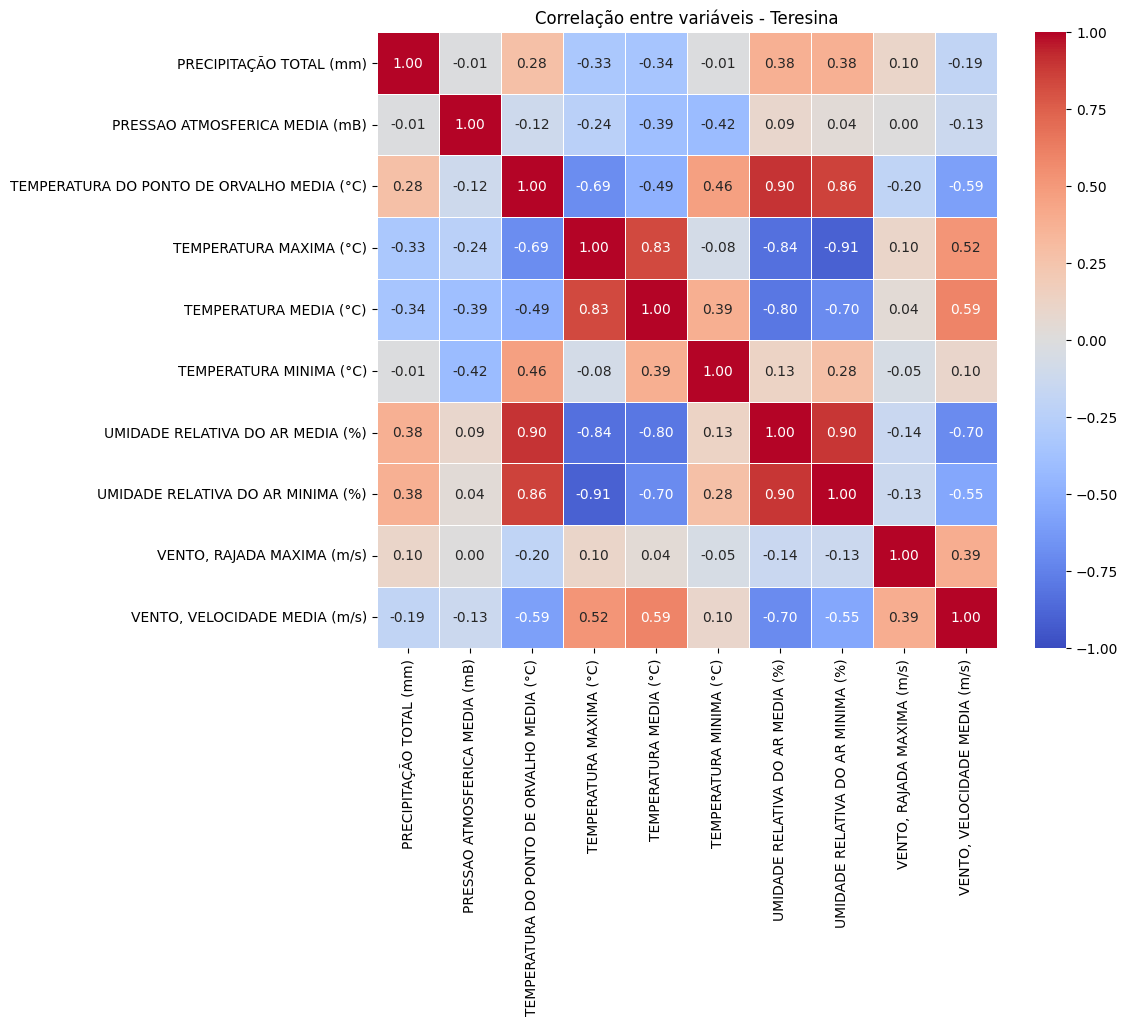


Correlação das Variáveis - Piripiri


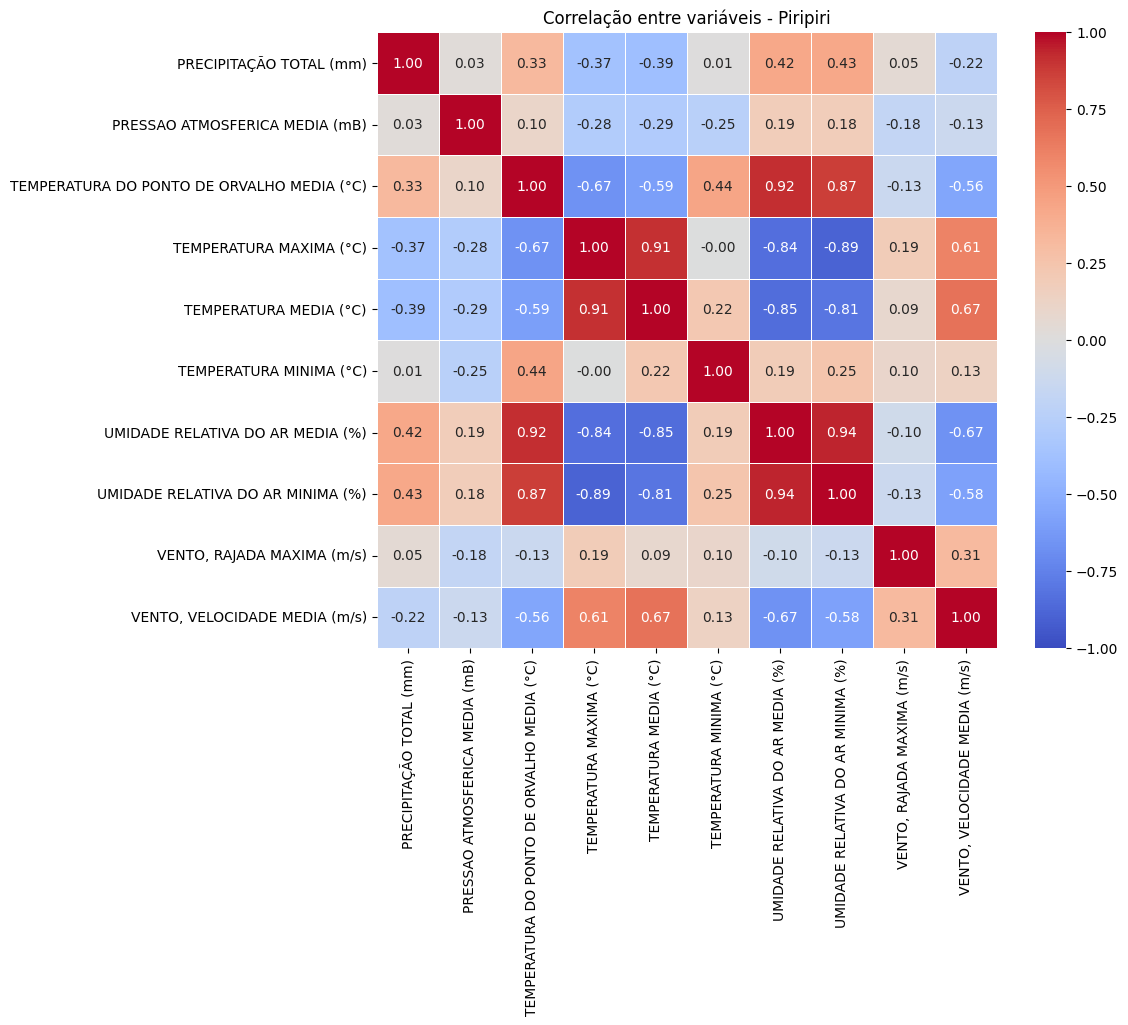


Correlação das Variáveis - Parnaiba


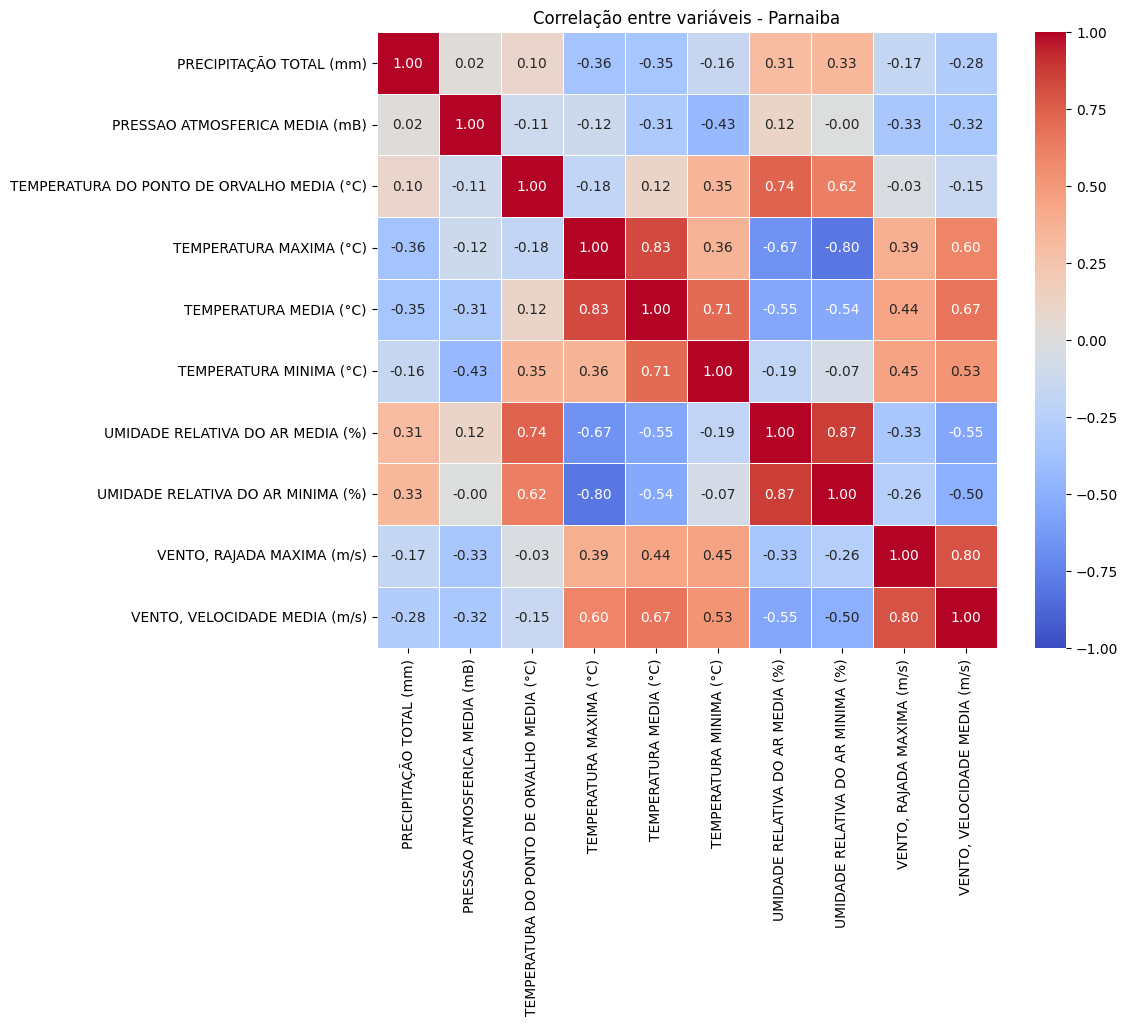

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for nome, caminho in arquivos.items():
    print(f"\n{'='*30}\nCorrelação das Variáveis - {nome}\n{'='*30}")
    
    # Leitura da base
    base = pd.read_csv(
        caminho,
        skiprows=10,
        sep=";",
        encoding="latin1"
    )
    
    # Identifica coluna de data
    col_data = None
    for col in base.columns:
        if "data" in col.lower():
            col_data = col
            break

    # Converte para float (exceto data)
    for col in base.columns:
        if col != col_data:
            try:
                base[col] = pd.to_numeric(base[col].str.replace(',', '.'), errors='coerce')
            except:
                pass

    # Colunas numéricas válidas
    colunas_numericas = base.select_dtypes(include='number').columns
    if col_data in colunas_numericas:
        colunas_numericas = colunas_numericas.drop(col_data)

   
    # Matriz de Correlação
    corr = base[colunas_numericas].corr()

    # Visualização com heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
    plt.title(f"Correlação entre variáveis - {nome}")
    plt.show()